In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os

# Download Latest Version of Data

In [ ]:
os.environ['KAGGLE_API_TOKEN'] = 'KGAT_58eef09ae0e1a90b67503f337bb73a06'
path = kagglehub.dataset_download("yashdevladdha/uber-ride-analytics-dashboard",
                                  path='ncr_ride_bookings.csv',
                                  output_dir="../data/raw",
                                  force_download=True)

100%|██████████| 24.4M/24.4M [00:03<00:00, 7.77MB/s]


## Load Data

In [35]:
data= pd.read_csv("../data/raw/ncr_ride_bookings.csv", index_col=0, parse_dates=True)
data.head()

,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
Date,,,,,,,,,,,,,,,,,,,,
2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,NaN,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,NaN,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,NaN,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,NaN,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


In [36]:
data.columns.to_list()

['Time',
 'Booking ID',
 'Booking Status',
 'Customer ID',
 'Vehicle Type',
 'Pickup Location',
 'Drop Location',
 'Avg VTAT',
 'Avg CTAT',
 'Cancelled Rides by Customer',
 'Reason for cancelling by Customer',
 'Cancelled Rides by Driver',
 'Driver Cancellation Reason',
 'Incomplete Rides',
 'Incomplete Rides Reason',
 'Booking Value',
 'Ride Distance',
 'Driver Ratings',
 'Customer Rating',
 'Payment Method']

## EDA
Looking at January and February data to compare the booking values composition by vehicle type

In [54]:
jan_data = data.loc['2024-01']
aug_data = data.loc['2024-08']
print(jan_data.shape)
print(aug_data.shape)

(12861, 20)
(12636, 20)


In [55]:
def generate_pie_chart(data):
    booking_value_per_vehicle_type = data.groupby('Vehicle Type')['Booking Value'].sum()
    # Ask Gemini how to include both the total counts and percentages.
    total = booking_value_per_vehicle_type.sum()
    def make_autopct(values):
        def autopct(pct):
            val = int(round(pct * total / 100.0))
            return f'${val}\n({pct:.1f}%)'
        return autopct
    plt.pie(booking_value_per_vehicle_type,
        labels=booking_value_per_vehicle_type.index,
        autopct=make_autopct(booking_value_per_vehicle_type))
    plt.title("Booking Values by Vehicle Type")
    plt.show()

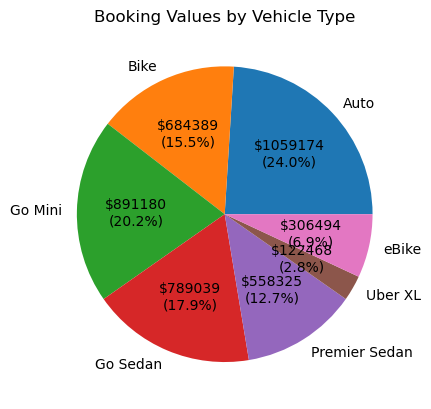

In [56]:
generate_pie_chart(jan_data)

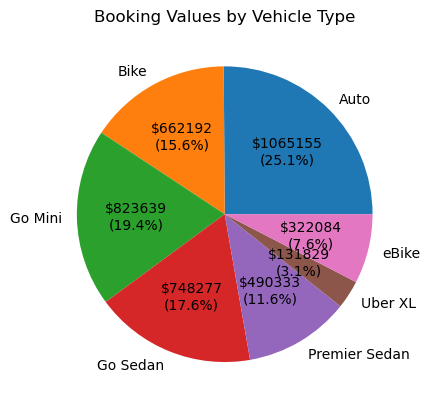

In [57]:
generate_pie_chart(aug_data)